In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

# Load dataset (adjust path if needed)
df = pd.read_csv("Binance_BTCUSDT_d.csv", skiprows=1)

# Clean and format
# The original code used 'date' but the column name is actually 'Date'
df['date'] = pd.to_datetime(df['Date'])
df = df.sort_values('date')

# Convert necessary columns to numeric
# Changed column names to match the actual column names in the CSV file
cols_to_numeric = ['Open', 'High', 'Low', 'Close', 'Volume USDT']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Handle missing values
df.fillna(method='ffill', inplace=True)

# Feature engineering
# Use 'Close' instead of 'close' to match the actual column name
df['return'] = df['Close'].pct_change()
df['rolling_volatility'] = df['return'].rolling(window=30).std()
# Use 'Close' instead of 'close' to match the actual column name
df['ma30'] = df['Close'].rolling(window=30).mean()

# Event periods
covid = df[(df['date'] >= '2020-03-01') & (df['date'] <= '2020-12-31')]
ukraine = df[(df['date'] >= '2022-02-01') & (df['date'] <= '2022-06-30')]
tariffs = df[(df['date'] >= '2025-02-01') & (df['date'] <= '2025-04-30')]

# Summary function
def event_summary(event_df, label):
    # Use 'Close' instead of 'close' to match the actual column name
    start_price = event_df['Close'].iloc[0]
    # Use 'Close' instead of 'close' to match the actual column name
    end_price = event_df['Close'].iloc[-1]
    price_change = (end_price - start_price) / start_price
    volatility = event_df['return'].std()
    avg_volume = event_df['Volume USDT'].mean()
    print(f"{label}:\n  Price Change: {price_change:.2%}\n  Volatility: {volatility:.4f}\n  Avg Daily Volume: ${avg_volume:,.0f}\n")

event_summary(covid, "COVID-19")
event_summary(ukraine, "Russia-Ukraine")
event_summary(tariffs, "Trump Tariffs")

COVID-19:
  Price Change: 239.01%
  Volatility: 0.0413
  Avg Daily Volume: $839,205,463

Russia-Ukraine:
  Price Change: -48.46%
  Volatility: 0.0388
  Avg Daily Volume: $2,048,943,595

Trump Tariffs:
  Price Change: -6.42%
  Volatility: 0.0322
  Avg Daily Volume: $2,513,504,353



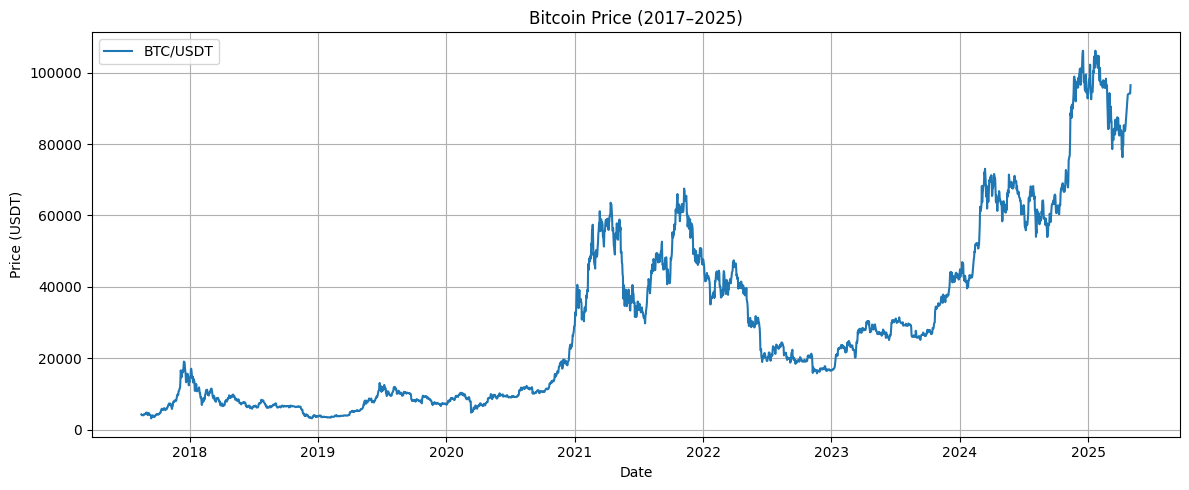

In [6]:
# 1. Price trend
plt.figure(figsize=(12, 5))
# Changed 'close' to 'Close' to match the actual column name
plt.plot(df['date'], df['Close'], label='BTC/USDT')
plt.title("Bitcoin Price (2017–2025)")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

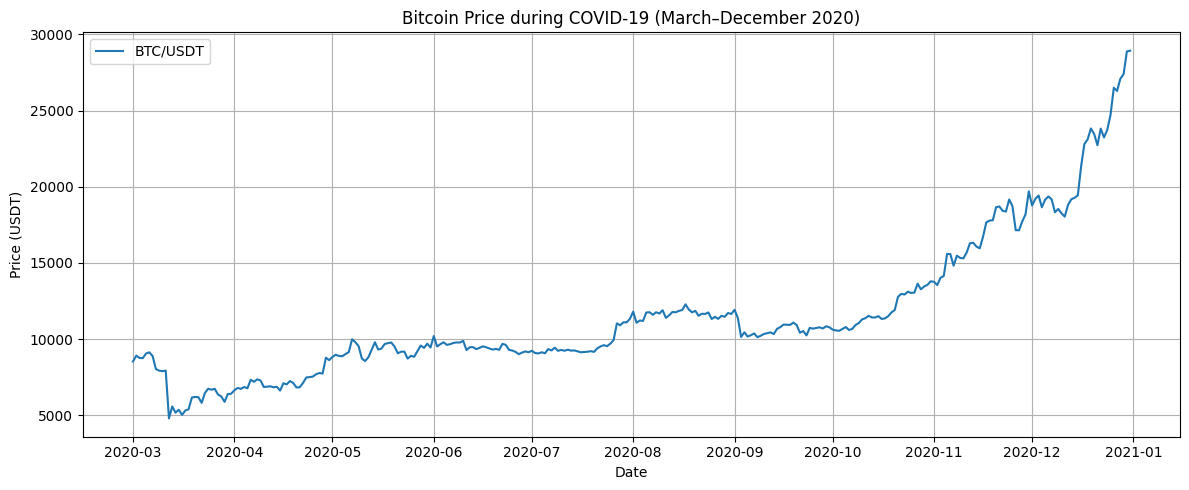

In [10]:
# COVID-19 Price Trend
covid_period = df[(df['date'] >= '2020-03-01') & (df['date'] <= '2020-12-31')]

plt.figure(figsize=(12, 5))
plt.plot(covid_period['date'], covid_period['Close'], label='BTC/USDT')
plt.title("Bitcoin Price during COVID-19 (March–December 2020)")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

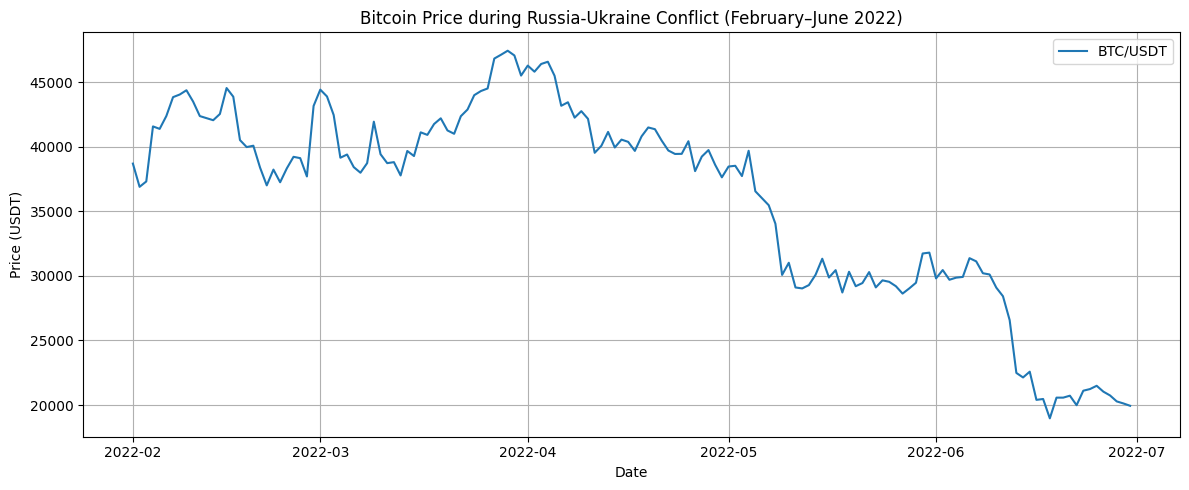

In [11]:
# Russia-Ukraine Conflict Price Trend
ukraine_period = df[(df['date'] >= '2022-02-01') & (df['date'] <= '2022-06-30')]

plt.figure(figsize=(12, 5))
plt.plot(ukraine_period['date'], ukraine_period['Close'], label='BTC/USDT')
plt.title("Bitcoin Price during Russia-Ukraine Conflict (February–June 2022)")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

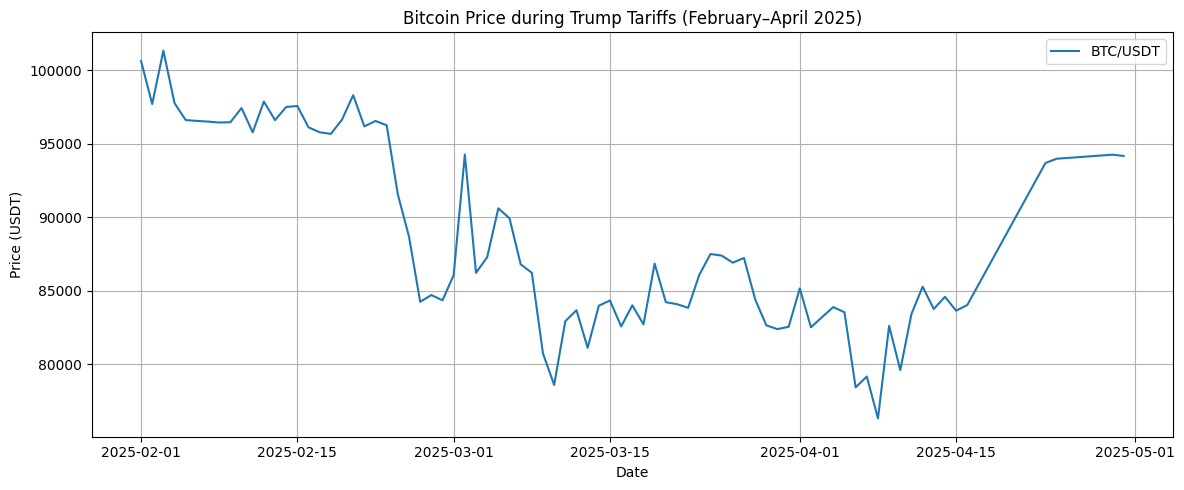

In [12]:
# Trump Tariffs Price Trend
tariffs_period = df[(df['date'] >= '2025-02-01') & (df['date'] <= '2025-04-30')]

plt.figure(figsize=(12, 5))
plt.plot(tariffs_period['date'], tariffs_period['Close'], label='BTC/USDT')
plt.title("Bitcoin Price during Trump Tariffs (February–April 2025)")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

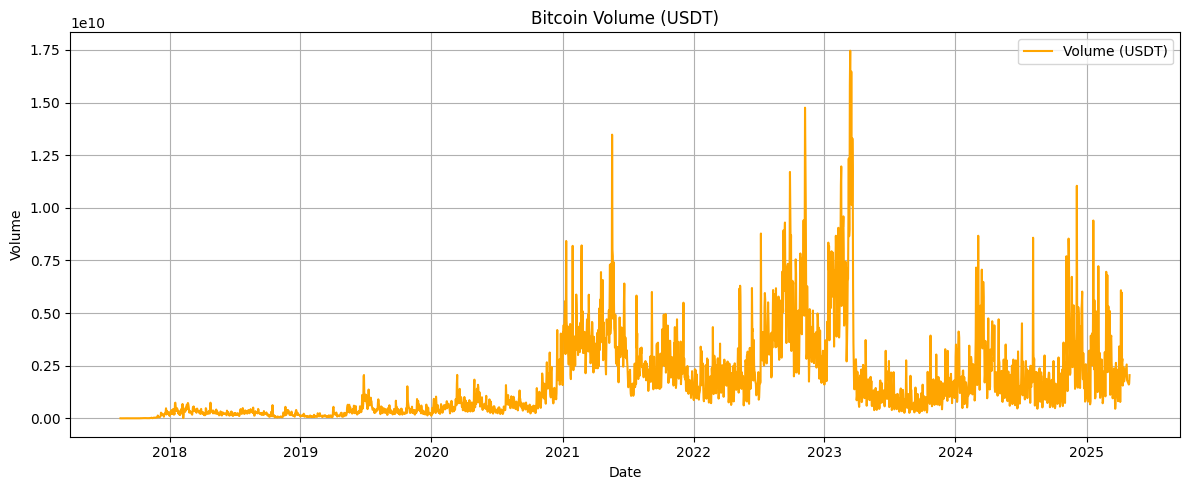

In [3]:
# 2. Volume trend
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['Volume USDT'], color='orange', label='Volume (USDT)')
plt.title("Bitcoin Volume (USDT)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


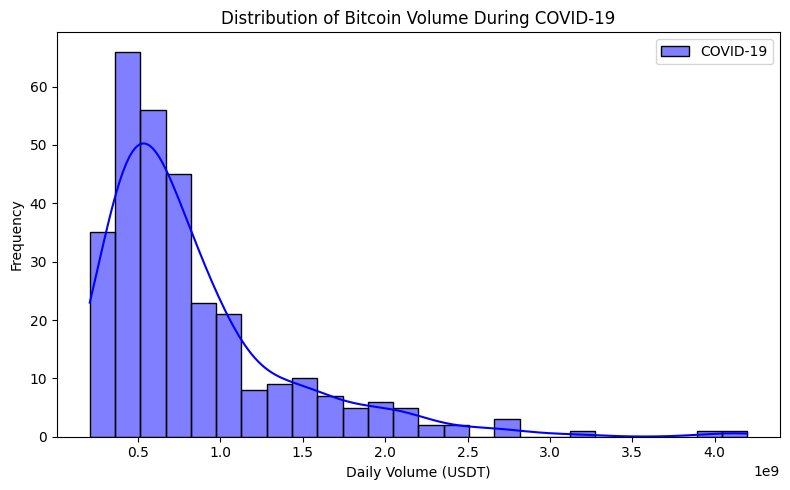

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'covid' DataFrame is already defined

plt.figure(figsize=(8, 5))  # Adjust figure size if needed
sns.histplot(covid['Volume USDT'], label='COVID-19', color='blue', kde=True)

plt.title("Distribution of Bitcoin Volume During COVID-19")
plt.xlabel("Daily Volume (USDT)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

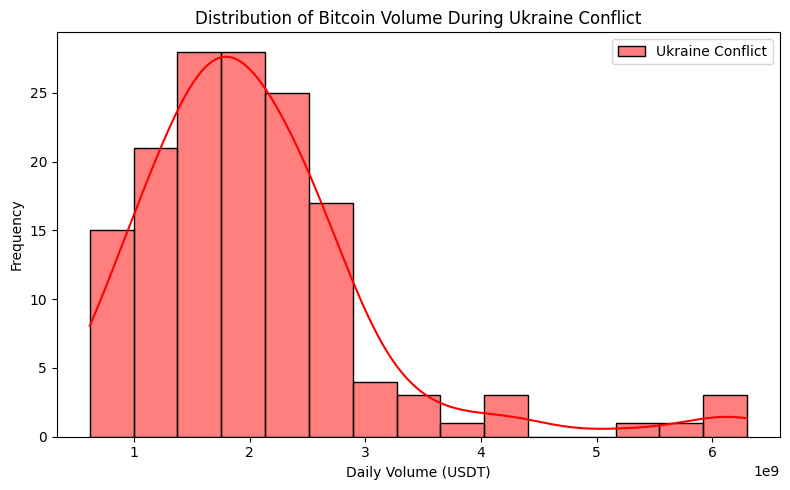

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ukraine' DataFrame is already defined

plt.figure(figsize=(8, 5))  # Adjust figure size if needed
sns.histplot(ukraine['Volume USDT'], label='Ukraine Conflict', color='red', kde=True)

plt.title("Distribution of Bitcoin Volume During Ukraine Conflict")
plt.xlabel("Daily Volume (USDT)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

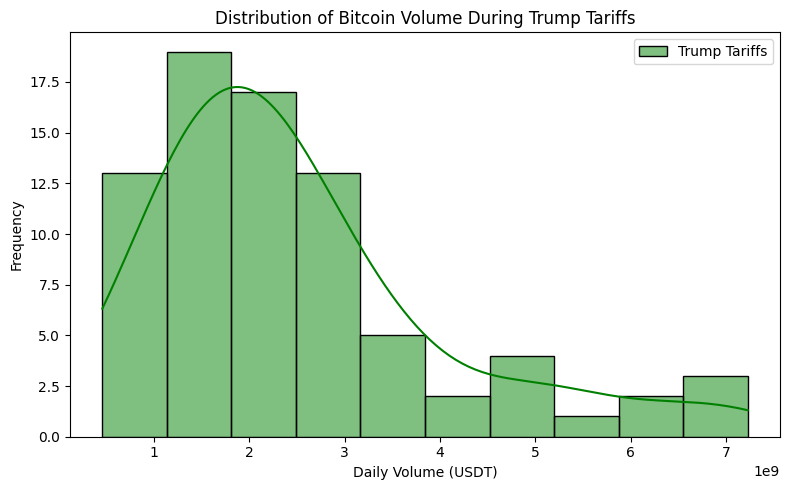

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'tariffs' DataFrame is already defined

plt.figure(figsize=(8, 5))  # Adjust figure size if needed
sns.histplot(tariffs['Volume USDT'], label='Trump Tariffs', color='green', kde=True)

plt.title("Distribution of Bitcoin Volume During Trump Tariffs")
plt.xlabel("Daily Volume (USDT)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

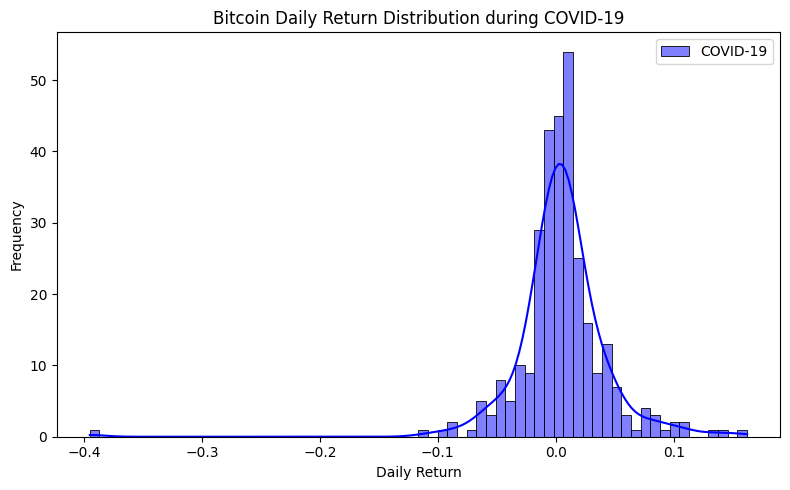

In [17]:
# COVID-19 Return Distribution
plt.figure(figsize=(8, 5))
sns.histplot(covid['return'].dropna(), label='COVID-19', color='blue', kde=True)
plt.title("Bitcoin Daily Return Distribution during COVID-19")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

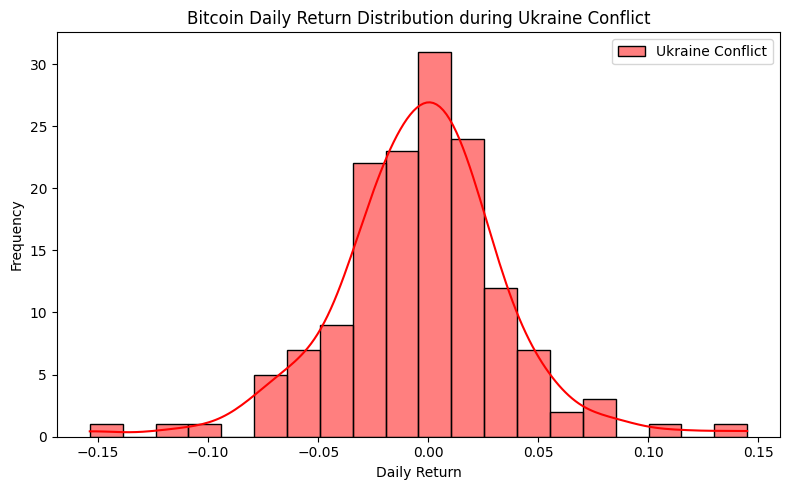

In [18]:
# Ukraine Conflict Return Distribution
plt.figure(figsize=(8, 5))
sns.histplot(ukraine['return'].dropna(), label='Ukraine Conflict', color='red', kde=True)
plt.title("Bitcoin Daily Return Distribution during Ukraine Conflict")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

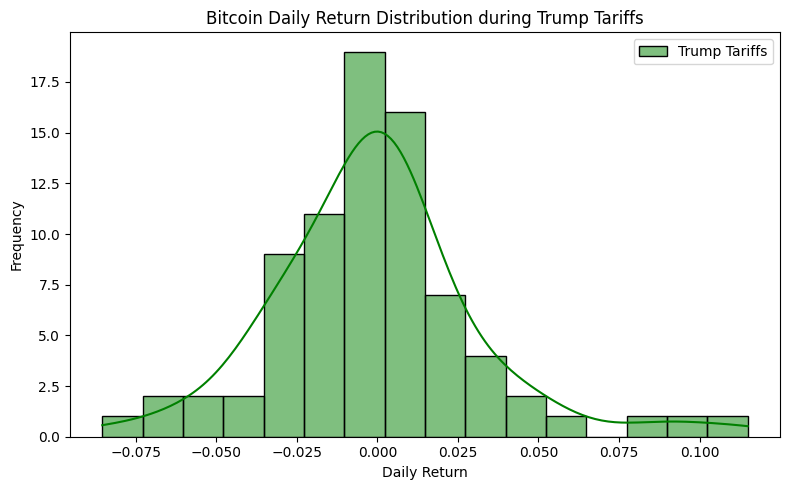

In [19]:
# Trump Tariffs Return Distribution
plt.figure(figsize=(8, 5))
sns.histplot(tariffs['return'].dropna(), label='Trump Tariffs', color='green', kde=True)
plt.title("Bitcoin Daily Return Distribution during Trump Tariffs")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

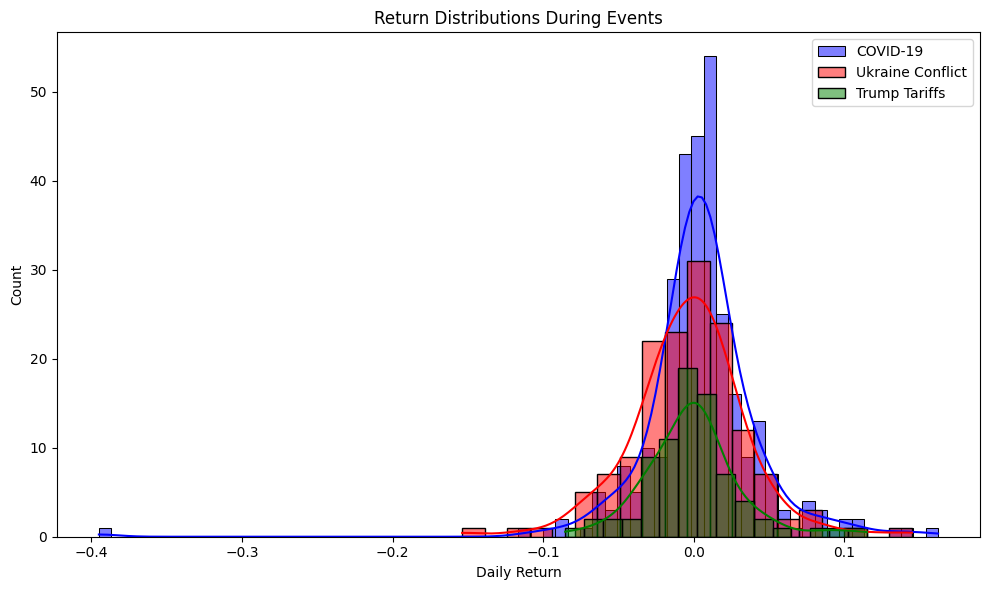

In [22]:
# 3. Event return distributions
plt.figure(figsize=(10, 6))
sns.histplot(covid['return'].dropna(), label='COVID-19', color='blue', kde=True)
sns.histplot(ukraine['return'].dropna(), label='Ukraine Conflict', color='red', kde=True)
sns.histplot(tariffs['return'].dropna(), label='Trump Tariffs', color='green', kde=True)
plt.legend()
plt.title("Return Distributions During Events")
plt.xlabel("Daily Return")
plt.tight_layout()
plt.show()

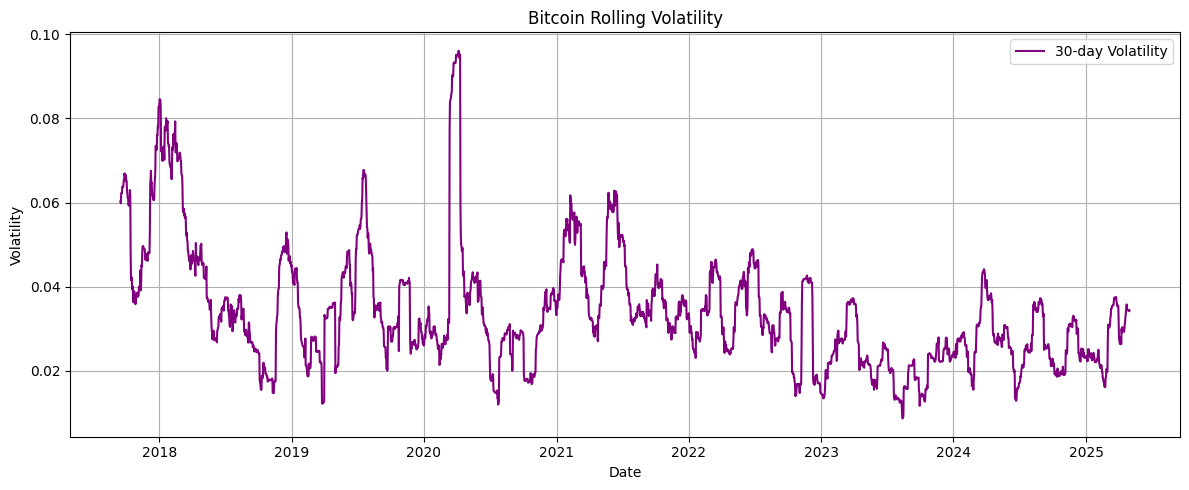

In [23]:
# 4. Rolling volatility
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['rolling_volatility'], color='purple', label='30-day Volatility')
plt.title("Bitcoin Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

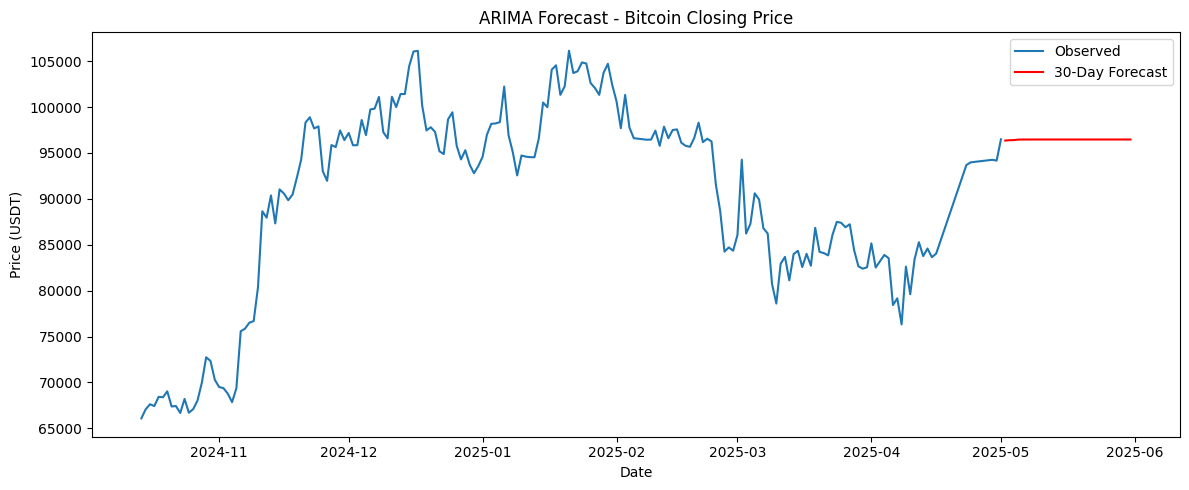

In [24]:
# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(btc_series[-200:], label='Observed')
plt.plot(forecast.index, forecast, color='red', label='30-Day Forecast')
plt.title("ARIMA Forecast - Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.legend()
plt.tight_layout()
plt.show()